In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.image as mpimg
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import PIL

In [108]:
url = 'https://www.fotmob.com/es/match/4205546/'
r = requests.get(url)
html = r.text
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>
<html lang="en"><head><meta content="app-id=488575683" name="apple-itunes-app"/><link href="android-app://com.mobilefootie.wc2010/http" rel="alternate"/><link href="/img/android-icon-192x192.png" rel="apple-touch-icon"/><meta content="all" name="robots"/><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/><meta content="FotMob" property="og:site_name"/><meta content="204905456199565" property="fb:app_id"/><meta content="christer.nordvik" property="fb:admins"/><meta content="https://www.facebook.com/fotmob" property="article:author"/><meta content="https://www.facebook.com/fotmob" property="article:publisher"/><meta content="iAsqa4atH8Kb02MqS9Sc0oZC__7WrvJYU6zYqJqE6Ww" name="google-site-verification"/><link href="https://pub.fotmob.com/prod/news/api/rss/world?fmt=atom" rel="alternate" title="World news" type="application/atom+xml"/><link href="https://www.fotmob.com/matches/real-madrid-vs-almeria/2tvf3g" hrefla

In [2]:
url = "https://www.fotmob.com/api/matchDetails?matchId=4205546"

response = requests.request("GET", url)
json_fotmob = response.json()

print(response.text)

{"general":{"matchId":"4205546","matchName":"Real Madrid-vs-Almeria_Sun, Jan 21, 2024, 15:15 UTC","matchRound":"21","teamColors":{"darkMode":{"home":"#ffffff","away":"#ee1119"},"lightMode":{"home":"#085098","away":"#C8282C"},"fontDarkMode":{"home":"rgba(29, 29, 29, 1.0)","away":"rgba(255, 255, 255, 1.0)"},"fontLightMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(255, 255, 255, 1.0)"}},"leagueId":87,"leagueName":"LaLiga","leagueRoundName":"Round 21","parentLeagueId":87,"countryCode":"ESP","parentLeagueName":"LaLiga","parentLeagueSeason":"2023/2024","parentLeagueTopScorerLink":"https://data.fotmob.com/stats/87/season/21053/goals.json","parentLeagueTournamentId":21053,"homeTeam":{"name":"Real Madrid","id":8633},"awayTeam":{"name":"Almeria","id":9865},"coverageLevel":"xG","matchTimeUTC":"Sun, Jan 21, 2024, 15:15 UTC","matchTimeUTCDate":"2024-01-21T15:15:00.000Z","started":true,"finished":true},"header":{"teams":[{"name":"Real Madrid","id":8633,"score":3,"imageUrl":"https://images.fot

In [ ]:
# save 
#with open("fotmob_data.json", "w") as json_file:
#    json.dump(json_fotmob, json_file)
#tt

# Stats for player to Match and Team

## Titulares

In [2]:
import requests
import pandas as pd
import re

# URL de la API
match_id = 4205546
url_stats_match = f"https://www.fotmob.com/api/matchDetails?matchId={match_id}"

# Realizar la solicitud GET a la API
response = requests.get(url_stats_match)
stats_match = response.json()

# Crear un DataFrame vacío para almacenar los resultados
resultados = pd.DataFrame()


In [ ]:
tt = stats_match['content']['lineup']['lineup'][0]['optaLineup']['players'][0]
stats_match['content']['lineup']['lineup'][0]['optaLineup']['players'][1]

In [120]:
len(stats_match['content']['lineup']['lineup'][0]['optaLineup']['players'])

5

In [123]:
import pandas as pd

# Crear una lista vacía para almacenar los datos de las estadísticas
stats_data = []

# Iterar sobre los diferentes niveles de la lista players
for i in range(len(stats_match['content']['lineup']['lineup'])):
    # Iterar sobre la lista de jugadores en el nivel actual
    for player_info in stats_match['content']['lineup']['lineup'][i]['optaLineup']['players']:
        # Iterar sobre las estadísticas de cada jugador
        for player in player_info:
            # Obtener el nombre del jugador
            player_name = player['name']['fullName']
            
            # Iterar sobre las estadísticas de cada jugador
            for stat in player['stats']:
                # Iterar sobre las claves y valores de las estadísticas
                for key, value in stat['stats'].items():
                    # Agregar los datos de las estadísticas a la lista
                    stats_data.append({
                        'player_name': player_name,
                        'stat_title': stat['title'],
                        'stat_key': key,
                        'stat_value': value['value']
                    })

# Convertir la lista de datos de estadísticas a un DataFrame de Pandas
stats_df = pd.DataFrame(stats_data)

# Mostrar el DataFrame de estadísticas
stats_df['porcentaje'] = stats_df['stat_value'].str.extract(r'(\d+)%').astype(float) / 100

stats_df['stat_value'] = stats_df['porcentaje'].fillna(stats_df['stat_value'])

# Eliminar la columna 'porcentaje' si ya no es necesaria
stats_df = stats_df.drop(columns=['porcentaje'])

stats_df


,player_name,stat_title,stat_key,stat_value
0,Kepa Arrizabalaga,Top stats,FotMob rating,5.62
1,Kepa Arrizabalaga,Top stats,Minutes played,90
2,Kepa Arrizabalaga,Top stats,Saves,0
3,Kepa Arrizabalaga,Top stats,Goals conceded,2
4,Kepa Arrizabalaga,Top stats,xGOT faced,1.10
...,...,...,...,...
602,Luis Maximiano,Top stats,Punches,0
603,Luis Maximiano,Top stats,Throws,2
604,Luis Maximiano,Top stats,High claim,1
605,Luis Maximiano,Top stats,Recoveries,15


<Figure size 700x700 with 0 Axes>

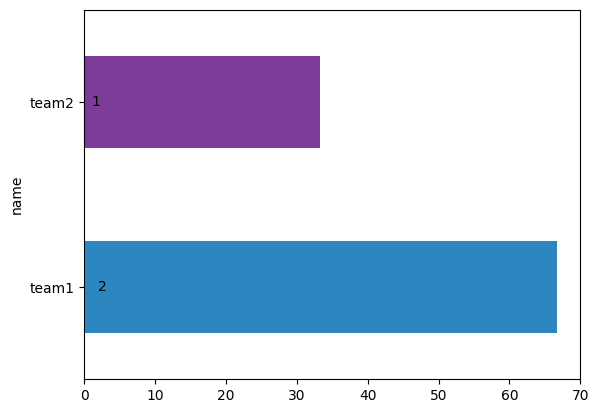

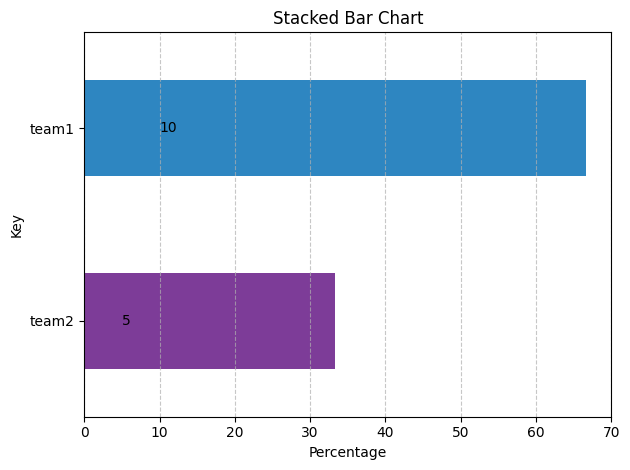

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    'name': ["team1", "team2", "team1", "team2"],
    'key': ["goals", "goals", "pass", "pass"],
    'stats': [2, 1, 10, 5]
}
df = pd.DataFrame(data)

# Normalizar los datos
df['normalized_stats'] = df.groupby('key')['stats'].transform(lambda x: x / x.sum() * 100)

# Crear el gráfico
plt.figure(figsize=(7, 7))
colors = ["#2E86C1", "#7D3C98"]
for key, group in df.groupby('key'):
    group.plot(kind='barh', x='name', y='normalized_stats', stacked=True, color=colors, legend=False)
    for i, val in enumerate(group['stats']):
        plt.text(val, i, str(val), va='center')
plt.xlabel('Percentage')
plt.ylabel('Key')
plt.title('Stacked Bar Chart')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invertir el eje Y para que coincida con el gráfico de ggplot
plt.tight_layout()

# Guardar el gráfico en alta calidad
plt.savefig('grafico.png', dpi=300)


## Suplentes

In [ ]:
json_fotmob['content']['lineup']['lineup'][0]['bench'][1]
json_fotmob['content']['lineup']['lineup'][0]['bench'][0]

In [110]:
json_fotmob.keys()

dict_keys(['general', 'header', 'nav', 'ongoing', 'hasPendingVAR', 'content', 'seo'])

# Shot Map

In [ ]:
json_fotmob['content']['shotmap']['shots']

In [112]:
df_teams = pd.DataFrame(json_fotmob['header']['teams'])
df_teams['home_way'] = [1,2]
df_tiros = pd.DataFrame(json_fotmob['content']['shotmap']['shots'])
df_tiros = pd.merge(df_tiros, df_teams, how='left', left_on='teamId', right_on='id')

In [113]:
print(df_tiros.columns)
print(df_teams.columns)

Index(['id_x', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y',
       'min', 'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor', 'shortName', 'name', 'id_y',
       'score', 'imageUrl', 'pageUrl', 'fifaRank', 'home_way'],
      dtype='object')
Index(['name', 'id', 'score', 'imageUrl', 'pageUrl', 'fifaRank', 'home_way'], dtype='object')


In [115]:
df_tiros.head(2)
#df_teams.info()

,id_x,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,fullName,teamColor,shortName,name,id_y,score,imageUrl,pageUrl,fifaRank,home_way
0,2637904071,Goal,9865,1077915,Largie Ramazani,94.0,39.881190,1,NaN,False,...,Largie Ramazani,#C8282C,NaN,Almeria,9865,2,https://images.fotmob.com/image_resources/logo...,/teams/9865/overview/almeria,None,2
1,2637910033,Miss,8633,895362,Rodrygo,89.8,46.312866,14,NaN,False,...,Rodrygo,#085098,NaN,Real Madrid,8633,3,https://images.fotmob.com/image_resources/logo...,/teams/8633/overview/real-madrid,None,1


In [128]:
logo_team1 = df_tiros[df_tiros['home_way'] == 1]['imageUrl'].unique()
gol_team1 = df_tiros[(df_tiros['eventType'] == 'Goal') & (df_tiros['home_way'] == 1)]
no_gol_team1 = df_tiros[df_tiros['eventType'] != 'Goal'][df_tiros.home_way == 1]

In [ ]:
print(logo_team1)
print(gol_team1)
print(no_gol_team1)

In [ ]:
no_gol_team1

In [ ]:
logo_team2 = df_tiros[df_tiros['home_way'] == 2]['imageUrl'].unique()
gol_team2 = df_tiros[(df_tiros['eventType'] == 'Goal') & (df_tiros['home_way'] == 2)]
no_gol_team2 = df_tiros[df_tiros['eventType'] != 'Goal']

In [140]:
logo_team1[0]

'https://images.fotmob.com/image_resources/logo/teamlogo/8633_small.png'

In [177]:
df_teams.iloc[1, 0]

'Almeria'

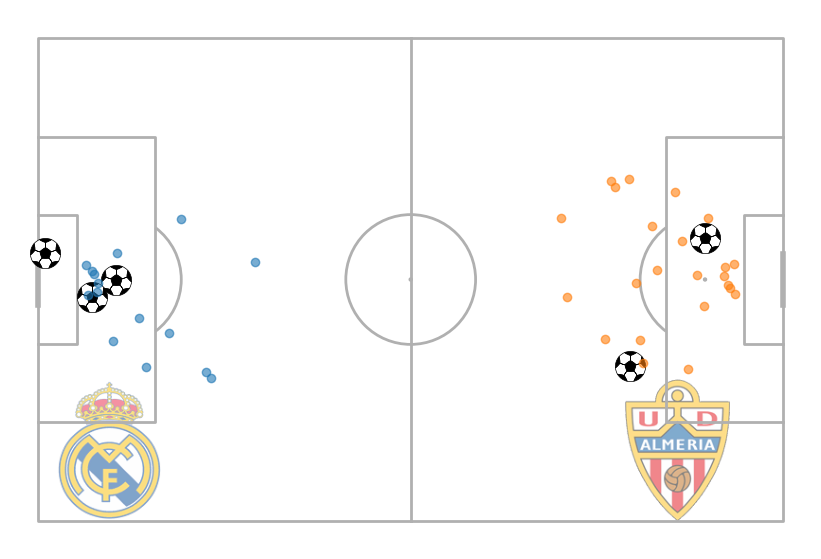

In [192]:
fig, ax = plt.subplots(figsize = (14,7))
pitch = Pitch(pitch_type='custom',pitch_length=105, pitch_width=68)
pitch.draw(ax=ax)

pitch.scatter(105 - gol_team1.x, 68 - gol_team1.y, ax=ax, marker='football')
pitch.scatter(105 - no_gol_team1.x, 68 - no_gol_team1.y, ax=ax, alpha = 0.6)
pitch.scatter(gol_team2.x, gol_team2.y, ax=ax, marker='football')
pitch.scatter(no_gol_team2.x, no_gol_team2.y, ax=ax, alpha = 0.6)

#pitch.scatter(gol_team2.x, no_gol_team2.y, ax=ax, alpha=.6)

logo_team1_url = urllib.request.urlretrieve(logo_team1[0], "images/"+ df_teams.iloc[0, 0]+".png")
logo_team1_url =  df_teams.iloc[0, 0]+".png"
img = PIL.Image.open("images/" + logo_team1_url)
# Mostrar el logo del equipo 1 en el gráfico
ax.imshow(img, extent=[0, 20, 0, 20], alpha=0.5)  

logo_team2_url = urllib.request.urlretrieve(logo_team2[0], "images/"+ df_teams.iloc[1, 0]+".png")
logo_team2_url =  df_teams.iloc[1, 0]+".png"
img2 = PIL.Image.open("images/" + logo_team2_url)
# Mostrar el logo del equipo 1 en el gráfico
ax.imshow(img2, extent=[80, 100, 0, 20], alpha=0.5) 



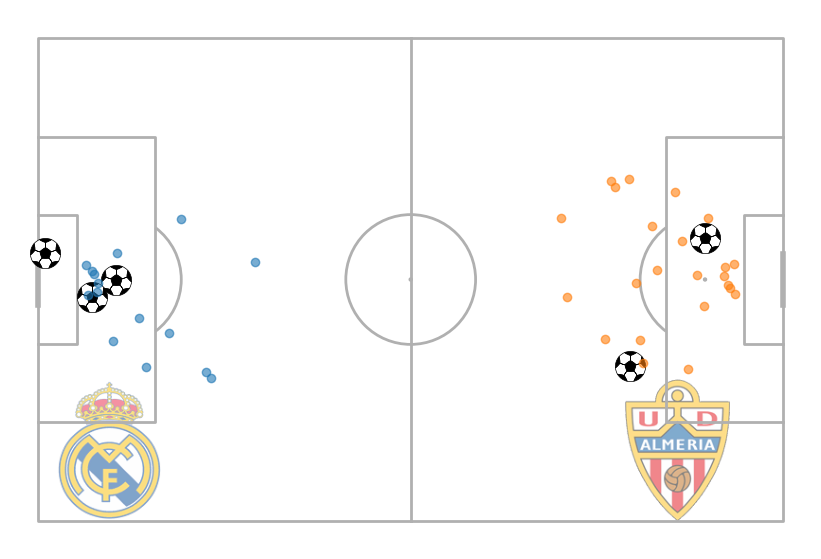

In [10]:

import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.image as mpimg
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import PIL

# libraries to graph
from mplsoccer import Pitch
import matplotlib.pyplot as plt

url = "https://www.fotmob.com/api/matchDetails?matchId=4205546"

response = requests.request("GET", url)
json_fotmob = response.json()

#print(response.text)

df_teams = pd.DataFrame(json_fotmob['header']['teams'])
df_teams['home_way'] = [1,2]
df_tiros = pd.DataFrame(json_fotmob['content']['shotmap']['shots'])
df_tiros = pd.merge(df_tiros, df_teams, how='left', left_on='teamId', right_on='id')

logo_team1 = df_tiros[df_tiros['home_way'] == 1]['imageUrl'].unique()
gol_team1 = df_tiros[(df_tiros['eventType'] == 'Goal') & (df_tiros['home_way'] == 1)]
no_gol_team1 = df_tiros[df_tiros['eventType'] != 'Goal'][df_tiros.home_way == 1]

logo_team2 = df_tiros[df_tiros['home_way'] == 2]['imageUrl'].unique()
gol_team2 = df_tiros[(df_tiros['eventType'] == 'Goal') & (df_tiros['home_way'] == 2)]
no_gol_team2 = df_tiros[df_tiros['eventType'] != 'Goal']

fig, ax = plt.subplots(figsize = (14,7))
pitch = Pitch(pitch_type='custom',pitch_length=105, pitch_width=68)
pitch.draw(ax=ax)

pitch.scatter(105 - gol_team1.x, 68 - gol_team1.y, ax=ax, marker='football')
pitch.scatter(105 - no_gol_team1.x, 68 - no_gol_team1.y, ax=ax, alpha = 0.6)
pitch.scatter(gol_team2.x, gol_team2.y, ax=ax, marker='football')
pitch.scatter(no_gol_team2.x, no_gol_team2.y, ax=ax, alpha = 0.6)

#pitch.scatter(gol_team2.x, no_gol_team2.y, ax=ax, alpha=.6)

logo_team1_url = urllib.request.urlretrieve(logo_team1[0], "images/"+ df_teams.iloc[0, 0]+".png")
logo_team1_url =  df_teams.iloc[0, 0]+".png"
img = PIL.Image.open("images/" + logo_team1_url)
# Mostrar el logo del equipo 1 en el gráfico
ax.imshow(img, extent=[0, 20, 0, 20], alpha=0.5)  

logo_team2_url = urllib.request.urlretrieve(logo_team2[0], "images/"+ df_teams.iloc[1, 0]+".png")
logo_team2_url =  df_teams.iloc[1, 0]+".png"
img2 = PIL.Image.open("images/" + logo_team2_url)
# Mostrar el logo del equipo 1 en el gráfico
ax.imshow(img2, extent=[80, 100, 0, 20], alpha=0.5) 

plt.show()